# **Header File**

---



In [0]:
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import random

In [0]:
df=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/ATP-Protein_Interaction/master/train.data')
test_df=pd.read_csv(r'https://raw.githubusercontent.com/samarth1107/ATP-Protein_Interaction/master/test.txt')

# **Train Data**

---



In [0]:
##File is created and saved to github
##Create array of 17 window length

def check(char):
  if char.islower():return 1
  return -1

window_size = 17//2                     #17 window size is taken

data = []
for row in range(len(df)):              #to get row number
  
  protein_size=len(df.loc[row][1])      #to get size of protein at row
  
  for i in range(protein_size):
    if i<window_size:
      data.append([ ('X'*(window_size-i)+df.loc[row][1][0:i+window_size+1]) , check(df.loc[row][1][i])])
    elif i>protein_size-window_size-1:
      data.append([ (df.loc[row][1][i-window_size:]+'X'*(i-protein_size+window_size+1)) , check(df.loc[row][1][i])])
    else:
      data.append([ (df.loc[row][1][i-window_size:i+window_size+1]) , check(df.loc[row][1][i])])

Train_data = pd.DataFrame(data, columns=['Sequence','Label'])
Train_data['Sequence'] = Train_data['Sequence'].apply(lambda x: x.upper())

In [0]:
## File creation
## Onehot coversion
codes = {'A':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10,'M':11, 'N':12, 'P':13, 'Q':14, 'R':15, 'S':16, 'T':17, 'V':18, 'W':19, 'X':20, 'Y':21}
onehot_matrix=pd.get_dummies(pd.Series(list('ACDEFGHIKLMNPQRSTVWXY')))

data = []
for row in range(len(Train_data)):                                      #to iterate through modified train data
  temp=[]
  for residue in Train_data.iloc[row,0]:                                #to get residue at ith row 
    temp.append(onehot_matrix.iloc[:,codes.get(residue,0)-1].tolist())
  temp=list(itertools.chain.from_iterable(temp))                        #to flatten list
  data.append([temp,Train_data.iloc[row,1]])

onehot_df = pd.DataFrame(data, columns = ['Onehot','Label'])

In [0]:
# To get hydrophobic feature
Hydrophobics = {'A':1, 'C':-1, 'D':0, 'E':0, 'F':1, 'G':-1, 'H':0, 'I':1, 'K':0, 'L':1,'M':1, 'N':-1, 'P':1, 'Q':-1, 'R':0, 'S':-1, 'T':-1, 'V':1, 'W':1, 'X':0, 'Y':-1}
data = []
for row in range(len(Train_data)):                                      #to iterate through modified train data
  temp=[]
  for residue in Train_data.iloc[row,0]:                                #to get residue at ith row 
    temp.append(Hydrophobics.get(residue,0))
  data.append(temp)
onehot_df['hydrophobicity']=(data)

In [0]:
onehot_df = shuffle(onehot_df)
onehot_df = onehot_df.reset_index(drop=True)

Interacting_residue=[]
count=0
for row in range(len(onehot_df)):
  if onehot_df.iloc[row,1]==1:
    Interacting_residue.append([onehot_df.iloc[row,0],onehot_df.iloc[row,2],onehot_df.iloc[row,1]])
    count+=1

for row in range(0,count+1):
  if onehot_df.iloc[row,1]==-1:
    Interacting_residue.append([onehot_df.iloc[row,0],onehot_df.iloc[row,2],onehot_df.iloc[row,1]])

equal=pd.DataFrame(Interacting_residue)
equal = shuffle(equal)
equal = equal.reset_index(drop=True)
print(equal.head())

X=[]
for row in range(len(equal)):
  X.append([equal.iloc[row,0],equal.iloc[row,1]])
  X[row]=list(itertools.chain.from_iterable(X[row]))
Y=equal.iloc[:,2].tolist()

                                                   0  ...  2
0  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  ... -1
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  ...  1
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  ...  1
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  ...  1
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  ... -1

[5 rows x 3 columns]


# **Test data**

---


In [0]:
## to create array of 17 size window
test_size=len(test_df.iloc[:,1])
test_data_raw=[]
window_size = 17//2

for row in range(test_size):              #to get row number
    if row<window_size:
      test_data_raw.append('X'*(window_size-row)+(''.join(map(str,test_df.iloc[0:row+window_size+1,1].tolist()))))
    elif row>test_size-window_size-1:
      test_data_raw.append((''.join(map(str,test_df.iloc[row-window_size:,1].tolist())))+'X'*(row-test_size+window_size+1))
    else:
      test_data_raw.append(''.join(map(str,test_df.iloc[row-window_size:row+window_size+1,1].tolist())))

test_data_raw=pd.DataFrame(test_data_raw)

In [0]:
## Onehot coversion
codes = {'A':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10,'M':11, 'N':12, 'P':13, 'Q':14, 'R':15, 'S':16, 'T':17, 'V':18, 'W':19, 'X':20, 'Y':21}

onehot_matrix=pd.get_dummies(pd.Series(list('ACDEFGHIKLMNPQRSTVWXY')))

Test_data=[]

for i in range(len(test_data_raw)):         #to iterate through modified train data
  temp=[]
  for residue in test_data_raw.iloc[i,0]:   #to get residue at ith row 
    temp.append(onehot_matrix.iloc[:,codes.get(residue,0)-1].tolist())
    #temp.append(codes.get(residue,0)-1)
  temp=list(itertools.chain.from_iterable(temp))
  Test_data.append([temp])

Test_data=pd.DataFrame(Test_data,columns=['Onehot'])

In [0]:
# Hydrophobic feature
Hydrophobics = {'A':1, 'C':-1, 'D':0, 'E':0, 'F':1, 'G':-1, 'H':0, 'I':1, 'K':0, 'L':1,'M':1, 'N':-1, 'P':1, 'Q':-1, 'R':0, 'S':-1, 'T':-1, 'V':1, 'W':1, 'X':0, 'Y':-1}
data = []
for row in range(len(test_data_raw)):                                      #to iterate through modified train data
  temp=[]
  for residue in test_data_raw.iloc[row,0]:                                #to get residue at ith row 
    temp.append(Hydrophobics.get(residue,0))
  data.append(temp)
Test_data['hydrophobicity']=(data)

In [0]:
X__predict=[]
for i in range(len(Test_data)):
  X__predict.append(list(itertools.chain.from_iterable([Test_data.iloc[i,0],Test_data.iloc[i,1]])))

# **Model Selection and testing on ROC_AUC**



---



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


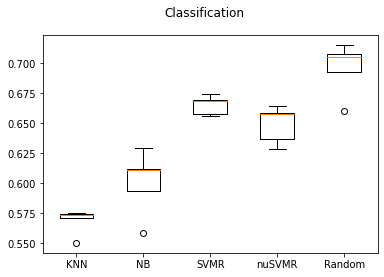

In [0]:
from statsmodels.stats import weightstats as stests
from sklearn.svm import LinearSVC
from sklearn.svm import SVC,NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('SVMR', SVC(kernel='rbf',gamma=0.01,C=5)))
models.append(('nuSVMR', NuSVC(kernel='rbf',gamma=0.01)))
models.append(('Random', RandomForestClassifier(n_estimators=130)))

results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True)
    res = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(res)
    names.append(name)

fig = plt.figure()                  
fig.suptitle('Classification')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

# **SVM model testing and training**

In [0]:
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [0]:
param_grid = {'C': [50,40,30,20,10],  
              'gamma': [10,1,0.1,0.001,0.0001], 
              'kernel': ['rbf']}  
  
grid = model_selection.GridSearchCV(svm.SVC(), param_grid, refit = True, cv = 5, scoring='roc_auc')
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

In [0]:
SVC_classifier = svm.SVC(kernel='rbf', C=40, gamma=0.1)
scores = model_selection.cross_val_score(SVC_classifier, X, Y, cv=5, scoring='roc_auc')
print(scores)
print(np.mean(scores))

In [0]:
SVC_classifier.fit(X_train,Y_train)

Y_predict=SVC_classifier.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

In [0]:
Predicted_result = SVC_classifier.predict(X__predict)

data = {'ID': test_df.iloc[:,0],
        'Lable': Predicted_result
        }
Sample = pd.DataFrame(data, columns = ['ID', 'Lable'])
Sample.to_csv('Output.csv',index=False)

# **Random forest testing and trainng**

In [0]:
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [0]:
n_estimate=[200,300,320,350,370]
scores=[]
for i in range(5):
  scores.append(model_selection.cross_val_score(RandomForestClassifier(n_estimators=n_estimate[i]), X, Y, cv=5, scoring="roc_auc"))
for i in scores:
  print(np.mean(i))

In [0]:
Randomclassifier = RandomForestClassifier(n_estimators=350)
Randomclassifier.fit(X_train,Y_train)

Y_predict=Randomclassifier.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

In [0]:
Predicted_result = Randomclassifier.predict(X__predict)

data = {'ID': test_df.iloc[:,0],
        'Lable': Predicted_result
        }
Sample = pd.DataFrame(data, columns = ['ID', 'Lable'])
Sample.to_csv('Output.csv',index=False)